# Classification without rebalancing

In [1]:
# import modules

import h5py
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support, classification_report, make_scorer
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential, load_model
from keras.layers import Dense, LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# read in data

data = pd.read_csv(r"C:\Users\hien\Desktop\masterdata\creditcard.csv")

## Data preprocessing

In [3]:
# Split into training and test set

x = data.iloc[:,:-1]      # dataframe without class feature
y = data.iloc[:,-1]       # selecting only class feature

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

print ("Percent of fraud in training: {:.2f}%".format(np.sum(y_train==1)/len(y_train)*100))
print ("Percent of fraud in test: {:.2f}%".format(np.sum(y_test==1)/len(y_test)*100))


Percent of fraud in training: 0.17%
Percent of fraud in test: 0.17%


In [4]:
#scaling amount and time to prevent data leakage

scale_amount = RobustScaler()
scale_time = RobustScaler()


scale_amount.fit(x_train.iloc[:,-1:])
x_train.iloc[:,-1:] = scale_amount.transform(x_train.iloc[:,-1:])
x_test.iloc[:,-1:]= scale_amount.transform(x_test.iloc[:,-1:])


scale_time.fit(x_train.iloc[:,0:1])
x_train.iloc[:,0:1] = scale_time.transform(x_train.iloc[:,0:1])
x_test.iloc[:,0:1] = scale_time.transform(x_test.iloc[:,0:1])



C:\Users\hien\anaconda\envs\new_env\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\hien\anaconda\envs\new_env\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\hien\anaconda\envs\new_env\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [5]:
# shape of input data

x_train.shape

(227845, 30)

In [6]:
# amount of input data

print("# Fraud in training: ", np.sum(y_train==1))
print("# Non-fraud in training: ", np.sum(y_train==0))
print("# Fraud in testing: ", np.sum(y_test==1))
print("# Non-fraud in testing: ", np.sum(y_test==0))

# Fraud in training:  394
# Non-fraud in training:  227451
# Fraud in testing:  98
# Non-fraud in testing:  56864


## Model implementation

In [7]:
# Training, validation and test set have the same imbalanced distribution

input_size = x_train.shape[1]
epochs = 50
batch_size = 2048
save_best_model = "desktop\credit_card_fraud_norebalancing1.hdf5"


In [8]:
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [20]:
#classifier = Sequential()
#classifier.add(Dense(8192, activation="relu", input_shape=(input_size,)))

#classifier.add(BatchNormalization())
#classifier.add(Dropout(0.7))

#classifier.add(Dense(1024, activation="relu", input_shape=(input_size,)))
#classifier.add(BatchNormalization())
#classifier.add(Dropout(0.7))



#classifier.add(Dense(1, activation="sigmoid"))

#classifier.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8192)              253952    
_________________________________________________________________
batch_normalization_4 (Batch (None, 8192)              32768     
_________________________________________________________________
dropout_4 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

Epoch 1/50
90/90 [==============================] - 309s 3s/step - loss: 0.4461 - accuracy: 0.8786 - val_loss: 0.0914 - val_accuracy: 0.9994
Epoch 2/50
90/90 [==============================] - 295s 3s/step - loss: 0.0659 - accuracy: 0.9965 - val_loss: 0.0205 - val_accuracy: 0.9993
Epoch 3/50
90/90 [==============================] - 293s 3s/step - loss: 0.0288 - accuracy: 0.9983 - val_loss: 0.0122 - val_accuracy: 0.9994
Epoch 4/50
90/90 [==============================] - 296s 3s/step - loss: 0.0186 - accuracy: 0.9989 - val_loss: 0.0078 - val_accuracy: 0.9994
Epoch 5/50
90/90 [==============================] - 293s 3s/step - loss: 0.0166 - accuracy: 0.9988 - val_loss: 0.0069 - val_accuracy: 0.9994
Epoch 6/50
90/90 [==============================] - 289s 3s/step - loss: 0.0142 - accuracy: 0.9990 - val_loss: 0.0076 - val_accuracy: 0.9994
Epoch 7/50
90/90 [==============================] - 290s 3s/step - loss: 0.0133 - accuracy: 0.9990 - val_loss: 0.0095 - val_accuracy: 0.9994
Epoch 8/50
90

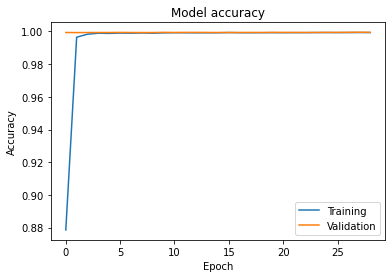

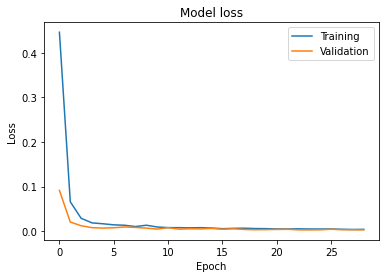

In [21]:

#classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
#checkpoint = ModelCheckpoint(save_best_model, monitor="val_loss", save_best_only=True, save_weights_only=False)
#earlystop = EarlyStopping(monitor="val_loss", patience=5)
#callbacks_list = [checkpoint, earlystop]
#history = classifier.fit(x_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list, shuffle=True)



# summarize history for accuracy
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Training', 'Validation'], loc='lower right')
#plt.show()

# summarize history for loss
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.legend(['Training', 'Validation'], loc='upper right')
#plt.show()

## Classification results

In [9]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc

In [10]:
classifier = load_model(save_best_model)
y_pred = classifier.predict(x_test)
y_pred = y_pred>=0.5

cm = confusion_matrix(y_test, y_pred)
print ("Confusion matrix:\n", cm)
print ("\n")

precision, recall, _ = precision_recall_curve(y_test, y_pred)

print ("accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print ("precision: {:.2f}".format(precision_score(y_test, y_pred)))
print ("recall: {:.2f}".format(recall_score(y_test, y_pred)))
print ("f1 score: {:.2f}".format(f1_score(y_test, y_pred)))
print ("Average precision: {:.2f}".format(average_precision_score(y_test, y_pred)))
print ("AUC-ROC: {:.2f}".format(roc_auc_score(y_test, y_pred)))

auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

Confusion matrix:
 [[56861     3]
 [   30    68]]


accuracy: 1.00
precision: 0.96
recall: 0.69
f1 score: 0.80
Average precision: 0.67
AUC-ROC: 0.85
Logistic PR AUC: 0.826


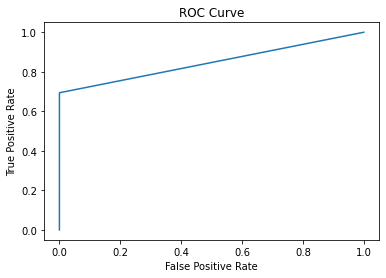

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model

plt.plot(fpr, tpr)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
# show the legend
#plt.legend()
# show the plot
plt.show()

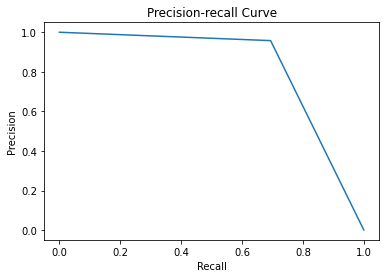

In [12]:

plt.plot(recall, precision)
plt.title("Precision-recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

## Feature impact with SHAP

In [13]:
#pip install shap
#pip install ipywidgets
#!python -m pip install jupyter_contrib_nbextensions

import shap
from ipywidgets import IntProgress

#explainer = shap.KernelExplainer(classifier.predict,x_train)
#shap_values = explainer.shap_values(x_test, nsamples=5)
#features = data.columns
#shap.summary_plot(shap_values,x_test,feature_names=features)

In [14]:

background = shap.kmeans(x_train, 100)
explainer = shap.KernelExplainer(classifier.predict, background)

In [15]:
random_100_x_test = x_test.sample(n=100)

In [16]:
shap_values = explainer.shap_values(random_100_x_test, nsamples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Feature Impact (Imbalanced Data)')

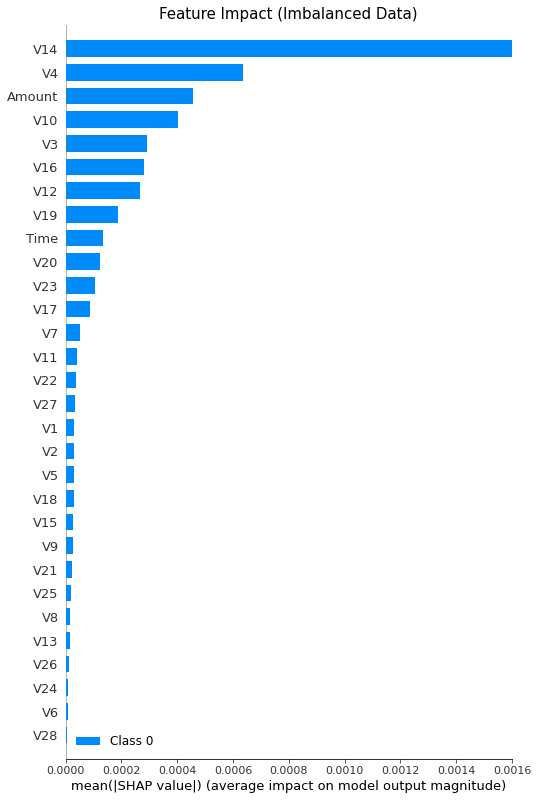

In [19]:
shap.summary_plot(shap_values, x_test, max_display=30, show=False)

# Get the current figure and axes objects.
fig, ax = plt.gcf(), plt.gca()

# Make the modifications that you want. I wanted
# to resize the x-axis, but you can do anything that you'd like.
xlim = 0.0016
ax.set_xlim(0, xlim)
ax.set_title("Feature Impact (Imbalanced Data)", fontdict={"size":15})

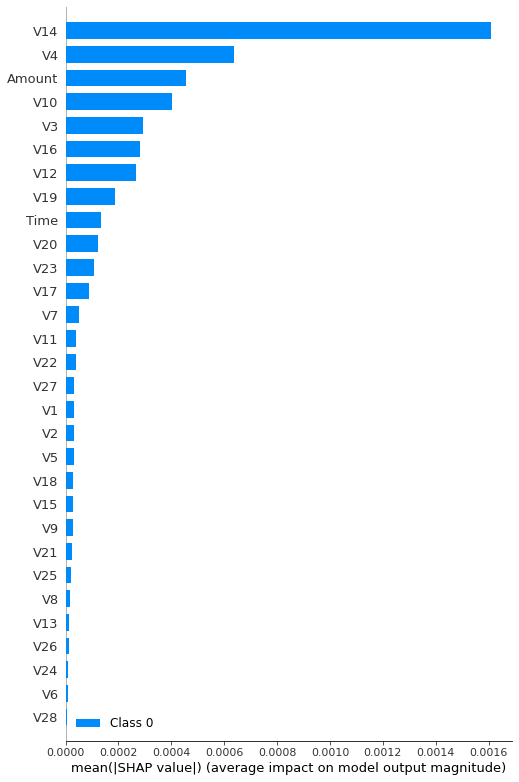

In [18]:
shap.summary_plot(shap_values, x_test, max_display=30)